In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Import from sklearn.metrics the function confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

# sing five epochs fits the model to the data
num_classes = 10
epochs = 5

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# normalize the image data in x_train and x_test (from 0 to 255)
# rescale this from 0 to 1

x_train = x_train/255

x_test= x_test/255

In [4]:
# split the training data into validation and training data 
# for cross validation
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

(48000, 28, 28)


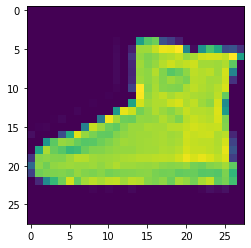

In [5]:
# visualise the image to have a look 
print(x_train.shape)

image = x_train[10,:]
plt.imshow(image)
plt.show()

In [6]:
# Define model
nrows = 28
ncols = 28
batch = 512

image_shape = (nrows, ncols, 1) # 3d with rows and columns

In [7]:
# formate the x_train, x_test and x_validate sets.

print (x_train.shape)

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

print (x_train.shape)

(48000, 28, 28)
(48000, 28, 28, 1)


In [8]:
# Use the Keras Sequential approach to building neural net.
# Use the ReLU activation function for the layer
# Use 512 (2^9) units for the hidden layer.

model_cnn = Sequential([
    Conv2D(filters=32, kernel_size=3,activation='relu', input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(512,activation='relu'),
    Dense(10,activation = 'softmax')
])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# complie the mode 
model_cnn.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001), 
                  metrics =['accuracy'])

model_cnn.fit(
    x_train,
    y_train,
    batch_size=batch,
    epochs=epochs,
    verbose=1,
    validation_data=(x_validate, y_validate),
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/5





48000/48000 [==============================] - 18s 374us/step - loss: 0.5610 - acc: 0.8025 - val_loss: 0.3797 - val_acc: 0.8701
Epoch 2/5
48000/48000 [==============================] - 18s 375us/step - loss: 0.3586 - acc: 0.8728 - val_loss: 0.3139 - val_acc: 0.8906
Epoch 3/5
48000/48000 [==============================] - 18s 379us/step - loss: 0.3167 - acc: 0.8872 - val_loss: 0.2835 - val_acc: 0.9005
Epoch 4/5
48000/48000 [==============================] - 17s 360us/step - loss: 0.2831 - acc: 0.8975 - val_loss: 0.2702 - val_acc: 0.9037
Epoch 5/5
48000/48000 [==============================] - 19s 389us/step - loss: 0.2654 - acc: 0.9045 - val_loss: 0.2727 - val_acc: 0.9025


In [41]:
# Print the confusion matrix of the errors on the test data.
y_pred = model_cnn.predict(x_test)

matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

In [42]:
print(matrix)

names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
 
print('Classification Report')
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=names))

[[851   0   8  21   1   2 112   0   5   0]
 [  2 960   1  26   2   0   8   0   1   0]
 [ 17   0 807  11  34   0 130   0   1   0]
 [ 15   3  11 907  11   0  53   0   0   0]
 [  1   1  85  45 718   0 149   0   1   0]
 [  0   0   0   0   0 976   0  15   0   9]
 [118   1  43  27  28   0 776   0   7   0]
 [  0   0   0   0   0  16   0 966   0  18]
 [  2   0   1   4   1   3  12   5 972   0]
 [  0   0   0   0   0   6   2  42   0 950]]
Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.84      0.81      0.83      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.90      0.72      0.80      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.62      0.78      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankl

In [23]:
# find the second largest number in an array
def getSecondHighest(a):
    hi = mid = lo = 0
    for i in range(0, len(a)):
        x = a[i]
        if ( x > hi):
            lo = mid
            mid = hi
            hi = x
        elif ( x < hi and x > mid):
            lo = mid
            mid = x
        elif ( x < lo):
            lo = x
    return mid

In [44]:
y_pred.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_test.shape

In [64]:
# find predicts incorrectly and draw the pattern
# show the value of the predicted softmax function for incorrectly classified pattern

count_2ndcorrect = 0
count_all = 0

# save the actual names of classes not their numerical codes for both actual and predicted values
# as well as the class probabilities.
actual_names = []
prediceted_names = []
class_prob = []

for i in range(len(y_test)):
    if y_test[i]!=y_pred.argmax(axis=1)[i]:
        
        count_all += 1
        
        # comment this plot part to speed up if needed 
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.show()
        print("predicted value of ",i,':', y_pred.argmax(axis=1)[i], " actual value:", y_test[i])
        
        actual_names.append(names[y_test[i]])
        prediceted_names.append(names[y_pred.argmax(axis=1)[i]])
        class_prob.append(y_pred[i])
        
        y_pred_2ndscore = getSecondHighest(y_pred[i])
        y_pred_2ndindex = y_pred[i].tolist().index(y_pred_2ndscore)
        if y_pred_2ndindex==y_test[i]:
            count_2ndcorrect += 1

predicted value of  12 : 5  actual value: 7
predicted value of  23 : 5  actual value: 9
predicted value of  25 : 6  actual value: 4
predicted value of  40 : 0  actual value: 6
predicted value of  42 : 6  actual value: 3
predicted value of  49 : 6  actual value: 2
predicted value of  51 : 6  actual value: 4
predicted value of  57 : 6  actual value: 4
predicted value of  66 : 3  actual value: 2
predicted value of  68 : 7  actual value: 9
predicted value of  98 : 2  actual value: 4
predicted value of  107 : 7  actual value: 9
predicted value of  136 : 6  actual value: 2
predicted value of  141 : 6  actual value: 0
predicted value of  147 : 3  actual value: 6
predicted value of  150 : 3  actual value: 4
predicted value of  153 : 3  actual value: 4
predicted value of  166 : 2  actual value: 4
predicted value of  172 : 6  actual value: 2
predicted value of  205 : 6  actual value: 4
predicted value of  227 : 6  actual value: 2
predicted value of  239 : 6  actual value: 4
predicted value of  2

predicted value of  1810 : 4  actual value: 3
predicted value of  1814 : 3  actual value: 4
predicted value of  1825 : 7  actual value: 5
predicted value of  1833 : 6  actual value: 3
predicted value of  1836 : 6  actual value: 0
predicted value of  1852 : 6  actual value: 3
predicted value of  1856 : 6  actual value: 4
predicted value of  1861 : 6  actual value: 0
predicted value of  1867 : 6  actual value: 0
predicted value of  1878 : 6  actual value: 2
predicted value of  1879 : 6  actual value: 4
predicted value of  1905 : 6  actual value: 0
predicted value of  1910 : 6  actual value: 0
predicted value of  1917 : 2  actual value: 4
predicted value of  1943 : 0  actual value: 6
predicted value of  1945 : 3  actual value: 0
predicted value of  1949 : 6  actual value: 2
predicted value of  1953 : 7  actual value: 5
predicted value of  1954 : 7  actual value: 9
predicted value of  1955 : 3  actual value: 1
predicted value of  1964 : 4  actual value: 2
predicted value of  1968 : 6  actu

predicted value of  3534 : 4  actual value: 2
predicted value of  3540 : 6  actual value: 0
predicted value of  3553 : 0  actual value: 2
predicted value of  3554 : 6  actual value: 2
predicted value of  3568 : 6  actual value: 4
predicted value of  3575 : 6  actual value: 0
predicted value of  3585 : 6  actual value: 2
predicted value of  3586 : 6  actual value: 0
predicted value of  3588 : 2  actual value: 6
predicted value of  3609 : 2  actual value: 0
predicted value of  3625 : 0  actual value: 6
predicted value of  3626 : 3  actual value: 4
predicted value of  3639 : 3  actual value: 4
predicted value of  3649 : 6  actual value: 4
predicted value of  3669 : 2  actual value: 6
predicted value of  3673 : 0  actual value: 2
predicted value of  3706 : 6  actual value: 3
predicted value of  3714 : 6  actual value: 2
predicted value of  3730 : 3  actual value: 4
predicted value of  3731 : 2  actual value: 4
predicted value of  3733 : 5  actual value: 7
predicted value of  3745 : 7  actu

predicted value of  5397 : 2  actual value: 4
predicted value of  5415 : 2  actual value: 4
predicted value of  5424 : 3  actual value: 6
predicted value of  5429 : 6  actual value: 4
predicted value of  5441 : 2  actual value: 4
predicted value of  5442 : 0  actual value: 6
predicted value of  5459 : 6  actual value: 2
predicted value of  5464 : 2  actual value: 4
predicted value of  5468 : 6  actual value: 2
predicted value of  5470 : 4  actual value: 8
predicted value of  5471 : 6  actual value: 2
predicted value of  5474 : 4  actual value: 2
predicted value of  5476 : 7  actual value: 9
predicted value of  5488 : 0  actual value: 3
predicted value of  5497 : 4  actual value: 6
predicted value of  5510 : 8  actual value: 6
predicted value of  5511 : 6  actual value: 4
predicted value of  5512 : 6  actual value: 9
predicted value of  5520 : 9  actual value: 7
predicted value of  5521 : 2  actual value: 6
predicted value of  5522 : 0  actual value: 6
predicted value of  5525 : 7  actu

predicted value of  7258 : 4  actual value: 6
predicted value of  7267 : 2  actual value: 3
predicted value of  7278 : 6  actual value: 4
predicted value of  7307 : 6  actual value: 4
predicted value of  7314 : 6  actual value: 4
predicted value of  7319 : 6  actual value: 2
predicted value of  7321 : 6  actual value: 4
predicted value of  7323 : 6  actual value: 4
predicted value of  7325 : 5  actual value: 7
predicted value of  7332 : 1  actual value: 3
predicted value of  7334 : 0  actual value: 6
predicted value of  7343 : 0  actual value: 6
predicted value of  7355 : 6  actual value: 2
predicted value of  7369 : 0  actual value: 2
predicted value of  7393 : 3  actual value: 0
predicted value of  7405 : 6  actual value: 3
predicted value of  7416 : 0  actual value: 6
predicted value of  7424 : 2  actual value: 4
predicted value of  7432 : 6  actual value: 4
predicted value of  7442 : 4  actual value: 2
predicted value of  7446 : 5  actual value: 7
predicted value of  7450 : 2  actu

predicted value of  9122 : 0  actual value: 6
predicted value of  9126 : 7  actual value: 5
predicted value of  9133 : 0  actual value: 6
predicted value of  9141 : 4  actual value: 2
predicted value of  9149 : 6  actual value: 0
predicted value of  9154 : 6  actual value: 2
predicted value of  9165 : 6  actual value: 3
predicted value of  9177 : 2  actual value: 4
predicted value of  9180 : 0  actual value: 6
predicted value of  9183 : 8  actual value: 6
predicted value of  9204 : 3  actual value: 6
predicted value of  9211 : 0  actual value: 6
predicted value of  9218 : 2  actual value: 6
predicted value of  9222 : 0  actual value: 6
predicted value of  9225 : 6  actual value: 3
predicted value of  9227 : 0  actual value: 6
predicted value of  9237 : 2  actual value: 0
predicted value of  9238 : 5  actual value: 7
predicted value of  9244 : 3  actual value: 1
predicted value of  9247 : 2  actual value: 6
predicted value of  9251 : 6  actual value: 0
predicted value of  9260 : 2  actu

In [65]:
# Create a zipped list of tuples from above lists
zippedList =  list(zip(actual_names, prediceted_names, class_prob))

# Create a dataframe from zipped list

pd_incorrect = pd.DataFrame(zippedList, columns = ['actual_name' , 'prediceted_names', 'class_probabilities']) 
pd_incorrect

,actual_name,prediceted_names,class_probabilities
0,Sneaker,Sandal,"[0.00048659058, 0.00010229448, 0.00056643726, ..."
1,Ankle boot,Sandal,"[1.5136808e-05, 1.4297632e-07, 1.0047095e-06, ..."
2,Coat,Shirt,"[0.0014594586, 0.00036651775, 0.23326044, 0.00..."
3,Shirt,T-shirt/top,"[0.7381739, 1.6442893e-06, 0.00012526989, 0.00..."
4,Dress,Shirt,"[0.29968253, 0.001847414, 0.0196878, 0.1079029..."
...,...,...,...
1112,Coat,Shirt,"[0.003443102, 0.00028466334, 0.122100756, 0.00..."
1113,Pullover,T-shirt/top,"[0.58813876, 7.915547e-05, 0.0801543, 0.007428..."
1114,Shirt,T-shirt/top,"[0.84381974, 1.9054189e-05, 0.008963126, 0.000..."
1115,Pullover,Dress,"[0.12732802, 0.12283486, 0.17343429, 0.3263048..."


In [53]:
print(count_all)
print(count_2ndcorrect)

1117
830


In [47]:
# Examine and print the percentage of times among incorrect predictions 
# where the second choice is the correct one.
percentage_2nd = count_2ndcorrect/count_all
percentage_2nd

0.7430617726051925